***Necessary Libraries Importations***

In [1]:
import numpy as np
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import  np_utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import Nadam
from sklearn.decomposition import PCA

***Data Importation & Simple Visualization***

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Attack_type = "/content/drive/MyDrive/Colab Notebooks/AI Project/Dataset/Attack_types.txt"
Dataset = "/content/drive/MyDrive/Colab Notebooks/AI Project/Dataset/Dataset.txt"

In [5]:
Attack_type = "/content/drive/MyDrive/Colab Notebooks/AI Project/Dataset/Attack_types.txt"
Dataset = "/content/drive/MyDrive/Colab Notebooks/AI Project/Dataset/Dataset.txt"
dataframe=pd.read_csv(Dataset)
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
dataframe.shape

(125973, 43)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
dataframe.groupby('attack_category')['attack_category'].count()

attack_category
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: attack_category, dtype: int64

***Visualization through Graph Plot***

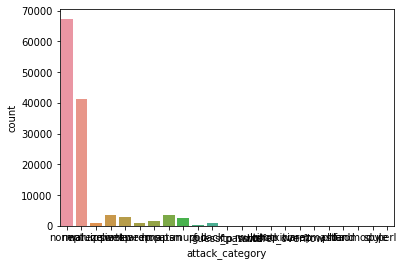

In [9]:
sns.countplot(x='attack_category', data=dataframe)

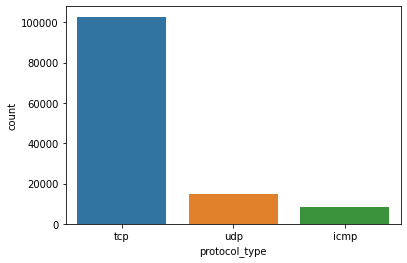

In [10]:
sns.countplot(x='protocol_type', data=dataframe)

In [11]:
dataframe.groupby('service')['service'].count()

service
IRC          187
X11           73
Z39_50       862
aol            2
auth         955
            ... 
urp_i        602
uucp         780
uucp_path    689
vmnet        617
whois        693
Name: service, Length: 70, dtype: int64

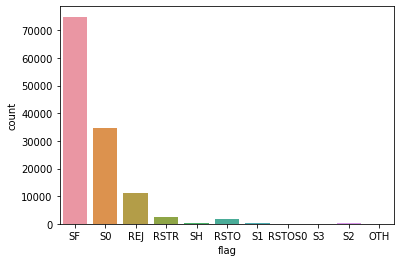

In [12]:
sns.countplot(x='flag', data=dataframe)

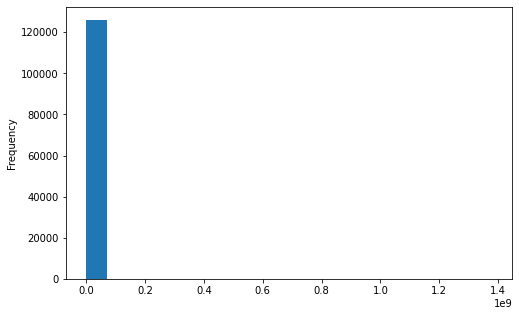

In [13]:
dataframe['src_bytes'].plot.hist(bins=20,figsize=(8,5))

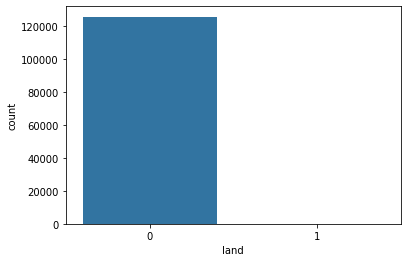

In [14]:
sns.countplot(x='land',data=dataframe)

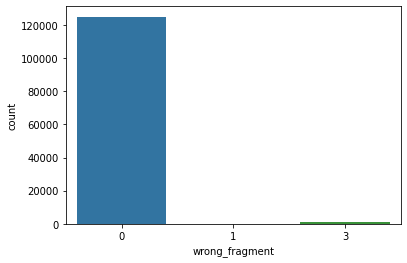

In [15]:
sns.countplot(x='wrong_fragment',data=dataframe)

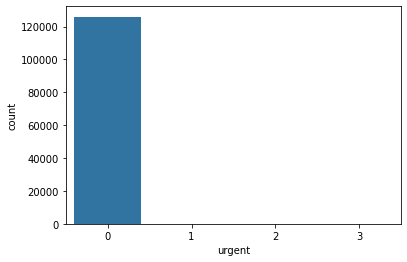

In [16]:
sns.countplot(x='urgent',data=dataframe)

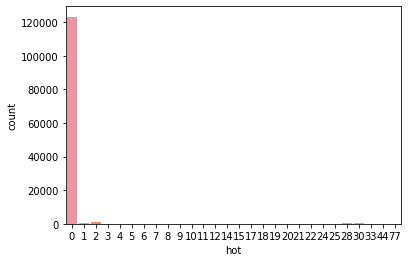

In [17]:
sns.countplot(x='hot',data=dataframe)

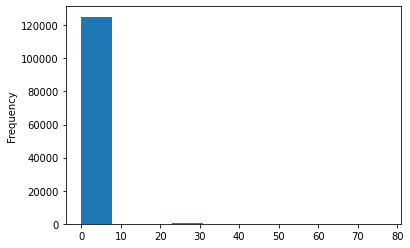

In [18]:
dataframe['hot'].plot.hist()

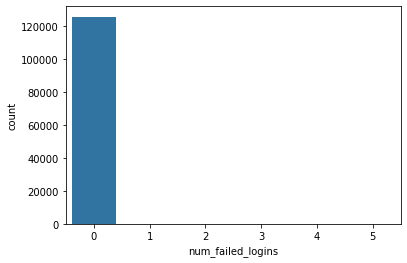

In [19]:
sns.countplot(x='num_failed_logins',data=dataframe)

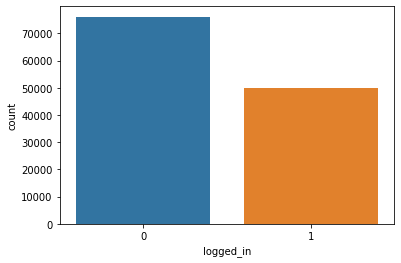

In [20]:
sns.countplot(x='logged_in',data=dataframe)

In [21]:
dataframe.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [22]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


***Data Cleaning & Pre-processing***

In [23]:
dummies_protocol_type=pd.get_dummies(dataframe['protocol_type'])
dummies_protocol_type

,icmp,tcp,udp
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
125968,0,1,0
125969,0,0,1
125970,0,1,0
125971,0,1,0


In [24]:
dummies_service=pd.get_dummies(dataframe['service'])
dummies_service

,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
dummies_flag=pd.get_dummies(dataframe['flag'])
dummies_flag

,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,1,0,0,0,0,0
125969,0,0,0,0,0,0,0,0,0,1,0
125970,0,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,1,0,0,0,0,0


In [26]:
dataframe=pd.concat([dataframe,dummies_protocol_type], axis=1)
dataframe=pd.concat([dataframe,dummies_service], axis=1)
dataframe=pd.concat([dataframe,dummies_flag], axis=1)
dataframe

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
dataframe.drop(['protocol_type','service','flag'], axis=1, inplace=True)
dataframe

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
scaler = MinMaxScaler()

scaler.fit(dataframe[['src_bytes']])
dataframe['src_bytes']=scaler.transform(dataframe[['src_bytes']])

scaler.fit(dataframe[['dst_bytes']])
dataframe['dst_bytes']=scaler.transform(dataframe[['dst_bytes']])

scaler.fit(dataframe[['duration']])
dataframe['duration']=scaler.transform(dataframe[['duration']])

scaler.fit(dataframe[['hot']])
dataframe['hot']=scaler.transform(dataframe[['hot']])

scaler.fit(dataframe[['occurance']])
dataframe['occurance']=scaler.transform(dataframe[['occurance']])

scaler.fit(dataframe[['wrong_fragment']])
dataframe['wrong_fragment']=scaler.transform(dataframe[['wrong_fragment']])

scaler.fit(dataframe[['count']])
dataframe['count']=scaler.transform(dataframe[['count']])

scaler.fit(dataframe[['srv_count']])
dataframe['srv_count']=scaler.transform(dataframe[['srv_count']])

scaler.fit(dataframe[['dst_host_count']])
dataframe['dst_host_count']=scaler.transform(dataframe[['dst_host_count']])

scaler.fit(dataframe[['dst_host_srv_count']])
dataframe['dst_host_srv_count']=scaler.transform(dataframe[['dst_host_srv_count']])

dataframe

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0.000000,3.558064e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0.952381,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,1.057999e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0.714286,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0.904762,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,1.681203e-07,6.223962e-06,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,1.442067e-07,3.206260e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.360078,0.048924,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0.952381,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,0.000186,7.608895e-08,1.106923e-07,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1.000000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125970,0.000000,1.616709e-06,2.931438e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,0.857143,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125971,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.281800,0.015656,1.0,1.0,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0.952381,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


***Conversion of Data into 5 Classes***

In [29]:
dataframe['attack_category']=dataframe['attack_category'].replace({'back':'dos','buffer_overflow':'u2r','ftp_write':'r2l','guess_passwd':'r2l',
                                                                   'imap':'r2l','ipsweep':'probe','land':'dos','loadmodule':'u2r','multihop':'r2l',
                                                                   'neptune':'dos','nmap':'probe','normal':'normal','perl':'u2r','phf':'r2l','pod':'dos',
                                                                   'portsweep':'probe','rootkit':'u2r','satan':'probe','smurf':'dos','spy':'r2l',
                                                                   'teardrop':'dos','warezclient':'r2l','warezmaster':'r2l'})

In [30]:
dataframe['attack_category']=dataframe['attack_category'].replace({'dos':1,'u2r':2,'r2l':3,'probe':4,'normal':5})

***Seperation of Lables***

In [31]:
y=dataframe['attack_category']
y

0         5
1         5
2         1
3         5
4         5
         ..
125968    1
125969    5
125970    5
125971    1
125972    5
Name: attack_category, Length: 125973, dtype: int64

***Data Encoding***

In [32]:
encoder=LabelEncoder()
encoder.fit(y)
encoded_Y=encoder.transform(y)

y = np_utils.to_categorical(encoded_Y)
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
x=dataframe.drop(['attack_category'],axis=1)
x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,icmp,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0.000000,3.558064e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,1.057999e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,1.681203e-07,6.223962e-06,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,1.442067e-07,3.206260e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.360078,0.048924,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,0.000186,7.608895e-08,1.106923e-07,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1.000000,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125970,0.000000,1.616709e-06,2.931438e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.857143,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125971,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.281800,0.015656,1.0,1.0,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


***Seperation of Data into Training and Testing Dataset***

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [35]:
x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,icmp,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0.000000,3.558064e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,1.057999e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,1.681203e-07,6.223962e-06,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,1.442067e-07,3.206260e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.360078,0.048924,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,0.000186,7.608895e-08,1.106923e-07,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1.000000,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125970,0.000000,1.616709e-06,2.931438e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.857143,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125971,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.281800,0.015656,1.0,1.0,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,icmp,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
102265,0.0,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.452055,0.001957,0.00,0.0,1.00,1.00,0.00,0.06,0.0,1.000000,0.003922,0.00,0.07,0.00,0.00,0.0,0.0,1.00,1.00,0.904762,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
60082,0.0,2.173970e-08,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.00,0.0,0.00,0.00,1.00,0.00,0.0,0.874510,0.874510,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,0.952381,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
71586,0.0,2.268175e-07,1.558090e-06,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.011742,0.011742,0.00,0.0,0.17,0.17,1.00,0.00,0.0,0.101961,1.000000,1.00,0.00,0.04,0.06,0.0,0.0,0.04,0.01,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
106515,0.0,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.181996,0.005871,0.00,0.0,1.00,1.00,0.03,0.08,0.0,1.000000,0.011765,0.01,0.07,0.00,0.00,0.0,0.0,1.00,1.00,1.000000,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
832,0.0,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.152642,0.001957,0.01,0.0,0.92,1.00,0.01,1.00,0.0,1.000000,0.003922,0.00,0.33,0.00,0.00,0.0,0.0,0.29,1.00,0.952381,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101350,0.0,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.252446,0.005871,1.00,1.0,0.00,0.00,0.02,0.08,0.0,1.000000,0.011765,0.01,0.07,0.00,0.00,1.0,1.0,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
124605,0.0,2.173970e-08,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.001957,0.001957,0.00,0.0,0.00,0.00,1.00,0.00,0.0,0.800000,0.800000,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,0.952381,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
20463,0.0,5.797253e-09,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.001957,0.050881,0.00,0.0,0.00,0.00,1.00,0.00,1.0,0.007843,0.431373,1.00,0.00,1.00,0.50,0.0,0.0,0.00,0.00,0.714286,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18638,0.0,5.797253e-09,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.001957,0.019569,0.00,0.0,0.00,0.00,1.00,0.00,1.0,0.003922,0.184314,1.00,0.00,1.00,0.51,0.0,0.0,0.00,0.00,0.809524,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
len(X_train)

88181

In [38]:
len(X_test)

37792

In [39]:
print(X_train.shape)
print(Y_train.shape)

(88181, 123)
(88181, 5)


***K-Nearest Neighbors Model***

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
Y_pred_knn = knn.predict(X_test)
print(Y_pred_knn[:20])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [43]:
print(Y_test[:20])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [44]:
print(accuracy_score(Y_test,Y_pred_knn))

0.9969041066892464


***1st ANN Model***

In [45]:
def create_model_1():
  model=Sequential()
  model.add(Dense(14,input_dim=123, activation='sigmoid'))
  model.add(Dense(25,activation='sigmoid'))
  model.add(Dense(30,activation='sigmoid'))
  model.add(Dense(20,activation='sigmoid'))
  model.add(Dense(5,activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])
  return model

In [46]:
model_1=create_model_1()
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                1736      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                375       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 105       
Total params: 3,616
Trainable params: 3,616
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
model_1_hist=model_1.fit(X_train,Y_train,epochs=20,verbose=1, validation_split=0.2)

Epoch 1/20
2205/2205 [==============================] - 5s 2ms/step - loss: 6.7590e-04 - accuracy: 0.9979 - val_loss: 7.4925e-04 - val_accuracy: 0.9976
Epoch 2/20
2205/2205 [==============================] - 4s 2ms/step - loss: 7.4790e-04 - accuracy: 0.9977 - val_loss: 9.5521e-04 - val_accuracy: 0.9971
Epoch 3/20
2205/2205 [==============================] - 4s 2ms/step - loss: 7.6313e-04 - accuracy: 0.9976 - val_loss: 6.7293e-04 - val_accuracy: 0.9980
Epoch 4/20
2205/2205 [==============================] - 5s 2ms/step - loss: 7.7507e-04 - accuracy: 0.9977 - val_loss: 6.8600e-04 - val_accuracy: 0.9980
Epoch 5/20
2205/2205 [==============================] - 5s 2ms/step - loss: 6.8830e-04 - accuracy: 0.9978 - val_loss: 6.6378e-04 - val_accuracy: 0.9978
Epoch 6/20
2205/2205 [==============================] - 5s 2ms/step - loss: 6.1088e-04 - accuracy: 0.9981 - val_loss: 5.8902e-04 - val_accuracy: 0.9981
Epoch 7/20
2205/2205 [==============================] - 5s 2ms/step - loss: 8.6163e-04 -

In [74]:
Y_prediction_1 = model_1.predict(X_test)
Y_prediction_1[:20].round()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [75]:
Y_test[:20]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [76]:
Score_1 = model_1.evaluate(X_test, Y_test,verbose=2)

1181/1181 - 1s - loss: 0.0011 - accuracy: 0.9968


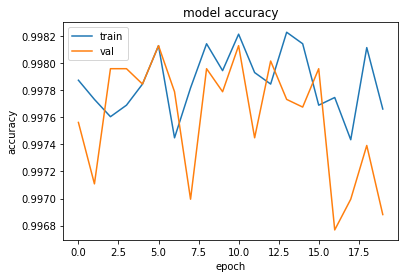

In [77]:
plt.plot(model_1_hist.history['accuracy'])
plt.plot(model_1_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

***2nd ANN Model***

In [78]:
def create_model_2():
  model=Sequential()
  model.add(Dense(20,input_dim=123, activation='relu'))
  model.add(Dense(22,activation='relu'))
  model.add(Dense(5,activation='softmax'))
  model.compile(Nadam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [79]:
model_2=create_model_2()
print(model_2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                2480      
_________________________________________________________________
dense_15 (Dense)             (None, 22)                462       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 115       
Total params: 3,057
Trainable params: 3,057
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
model_2_hist = model_2.fit(X_train,Y_train,epochs=40,verbose=1, validation_split=0.2)

Epoch 1/40
2205/2205 [==============================] - 5s 2ms/step - loss: 0.0567 - accuracy: 0.9594 - val_loss: 0.0139 - val_accuracy: 0.9889
Epoch 2/40
2205/2205 [==============================] - 4s 2ms/step - loss: 0.0102 - accuracy: 0.9926 - val_loss: 0.0083 - val_accuracy: 0.9939
Epoch 3/40
2205/2205 [==============================] - 4s 2ms/step - loss: 0.0071 - accuracy: 0.9944 - val_loss: 0.0065 - val_accuracy: 0.9950
Epoch 4/40
2205/2205 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9952 - val_loss: 0.0057 - val_accuracy: 0.9950
Epoch 5/40
2205/2205 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9958 - val_loss: 0.0051 - val_accuracy: 0.9963
Epoch 6/40
2205/2205 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9958 - val_loss: 0.0048 - val_accuracy: 0.9965
Epoch 7/40
2205/2205 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9962 - val_loss: 0.0043 - val_accuracy:

In [81]:
Y_prediction_2 = model_2.predict(X_test)
Y_prediction_2[:20].round()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [82]:
Y_test[:20]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [83]:
Score_2 = model_2.evaluate(X_test, Y_test,verbose=2)

1181/1181 - 1s - loss: 0.0043 - accuracy: 0.9984


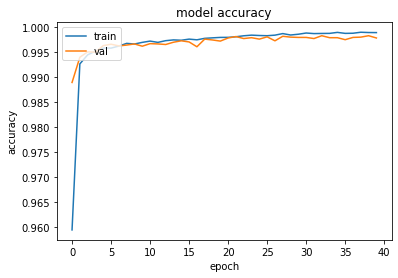

In [84]:
plt.plot(model_2_hist.history['accuracy'])
plt.plot(model_2_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

***K-Means Clustering***

In [85]:
km = KMeans(n_clusters=5)
cluster_lable = km.fit_predict(x)
cluster_lable

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [86]:
x['cluster_lable'] = cluster_lable

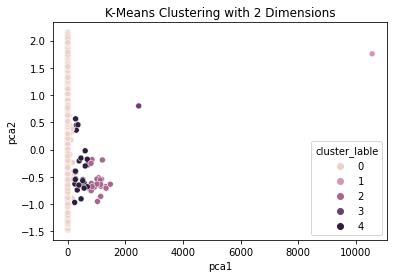

In [87]:
pca_num_components=2
reduced_data=PCA(n_components=pca_num_components).fit_transform(x)
results=pd.DataFrame(reduced_data,columns=['pca1','pca2'])

results.shape
sns.scatterplot(x='pca1',y='pca2',hue=x['cluster_lable'],data=results)
plt.title('K-Means Clustering with 2 Dimensions')
plt.show()

In [88]:
cluster_lable

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

***Generating Traing & Testing Dataset from Clustered Lable***

In [89]:
dataset = x.drop('cluster_lable',axis=1)
dataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,icmp,...,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0.000000,3.558064e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,1.057999e-07,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,1.681203e-07,6.223962e-06,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,1.442067e-07,3.206260e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.360078,0.048924,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,0.000186,7.608895e-08,1.106923e-07,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1.000000,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125970,0.000000,1.616709e-06,2.931438e-07,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.857143,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125971,0.000000,0.000000e+00,0.000000e+00,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.281800,0.015656,1.0,1.0,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.952381,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [90]:
encoder=LabelEncoder()
encoder.fit(cluster_lable)
encoded_Y=encoder.transform(cluster_lable)

cluster_lable = np_utils.to_categorical(encoded_Y)
cluster_lable

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(dataset,cluster_lable,test_size=0.2,random_state=5)

***ANN Model for Clustered Lables***

In [92]:
def create_model_km():
  model=Sequential()
  model.add(Dense(14,input_dim=123, activation='elu'))
  model.add(Dense(25,activation='elu'))
  model.add(Dense(30,activation='elu'))
  model.add(Dense(20,activation='elu'))
  model.add(Dense(5,activation='softmax'))
  model.compile(Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [93]:
model_km=create_model_km()
print(model_km.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 14)                1736      
_________________________________________________________________
dense_18 (Dense)             (None, 25)                375       
_________________________________________________________________
dense_19 (Dense)             (None, 30)                780       
_________________________________________________________________
dense_20 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 105       
Total params: 3,616
Trainable params: 3,616
Non-trainable params: 0
_________________________________________________________________
None


In [104]:
model_km_hist=model_km.fit(x_train,y_train,epochs=5,verbose=1,validation_split=0.3)

Epoch 1/5
2205/2205 [==============================] - 5s 2ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 2/5
2205/2205 [==============================] - 5s 2ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0041 - val_accuracy: 0.9996
Epoch 3/5
2205/2205 [==============================] - 5s 2ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 4/5
2205/2205 [==============================] - 5s 2ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 5/5
2205/2205 [==============================] - 5s 2ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9996


In [100]:
Y_prediction_km = model_km.predict(x_test)
Y_prediction_km[:20].round()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [101]:
y_train[:20]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [102]:
Score_km = model_km.evaluate(x_test, y_test,verbose=2)

788/788 - 1s - loss: 0.0013 - accuracy: 0.9998


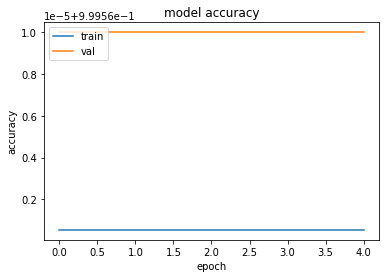

In [105]:
plt.plot(model_km_hist.history['accuracy'])
plt.plot(model_km_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()